In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from datetime import timedelta
import concurrent.futures
import json
import re
import logging
import os
from os import path
import sys
import warnings

In [3]:
import numpy as np
import pandas as pd
import statistics
from math import isnan, pi

In [4]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [5]:
import bokeh.io
from bokeh import *
from bokeh.io import output_notebook, output_file, show
from bokeh.models import Span, HoverTool, Title, Label, Legend, LegendItem, ColumnDataSource, Div
from bokeh.models import CustomJS, Slider
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.plotting import figure, Figure
from bokeh.layouts import row, column, layout
from bokeh.palettes import Category20c
from bokeh.transform import cumsum

In [6]:
from resource_monitoring import *
from test import *


In [7]:
import pickle

ds_meta_runtime = pickle.load(open("data/monitoring_dataset_50e68afe-a342-4357-9397-4de7b9300b10.metadata_runtime.pickle", "rb"))
ds_metrics = pickle.load(open("data/monitoring_dataset_50e68afe-a342-4357-9397-4de7b9300b10.metrics.pickle", "rb"))
ds_metadata = pickle.load(open("data/monitoring_dataset_50e68afe-a342-4357-9397-4de7b9300b10.metadata.pickle", "rb"))
ds_runtime = pickle.load(open("data/monitoring_dataset_50e68afe-a342-4357-9397-4de7b9300b10.runtime.pickle", "rb"))

In [176]:
ds_meta_runtime2 = pickle.load(open("/Users/dxiao/Downloads/new_runs/ASM_large.metadata_runtime.pickle", "rb"))
ds_metrics2 = pickle.load(open("/Users/dxiao/Downloads/new_runs/ASM_large.metrics.pickle", "rb"))

In [9]:
ds_meta_runtime2.shape

(23, 35)

In [11]:
ds_meta_runtime2.columns.tolist()

['meta_attempt',
 'meta_cpu',
 'meta_disk_mounts',
 'meta_disk_total_gb',
 'meta_disk_types',
 'meta_docker_image',
 'meta_end_time',
 'meta_execution_status',
 'meta_inputs',
 'meta_instance_name',
 'meta_mem_total_gb',
 'meta_preemptible',
 'meta_project_id',
 'meta_shard',
 'meta_start_time',
 'meta_task_call_name',
 'meta_workflow_id',
 'meta_workflow_name',
 'meta_zone',
 'meta_duration_sec',
 'runtime_attempt',
 'runtime_cpu_count',
 'runtime_cpu_platform',
 'runtime_disk_mounts',
 'runtime_disk_total_gb',
 'runtime_instance_id',
 'runtime_instance_name',
 'runtime_mem_total_gb',
 'runtime_preemptible',
 'runtime_project_id',
 'runtime_shard',
 'runtime_start_time',
 'runtime_task_call_name',
 'runtime_workflow_id',
 'runtime_zone']

In [13]:
example_row = ds_meta_runtime2.iloc[0,:]

In [16]:
len(example_row['meta_inputs'])

22

## metrics, large data

In [17]:
ds_metrics2 = pickle.load(open("/Users/dxiao/Downloads/new_runs/ASM_large.metrics.pickle", "rb"))

In [18]:
ds_metrics2.shape

(44071, 7)

In [19]:
ds_metrics2.columns.tolist()

['metrics_cpu_used_percent',
 'metrics_disk_read_iops',
 'metrics_disk_used_gb',
 'metrics_disk_write_iops',
 'metrics_instance_id',
 'metrics_mem_used_gb',
 'metrics_timestamp']

In [ ]:
ds_metrics2.iloc[0,:]

In [ ]:
test = ResourceUsage(ds_meta_runtime2, ds_metrics2, "tester");

Working on Task: ShardLongReads


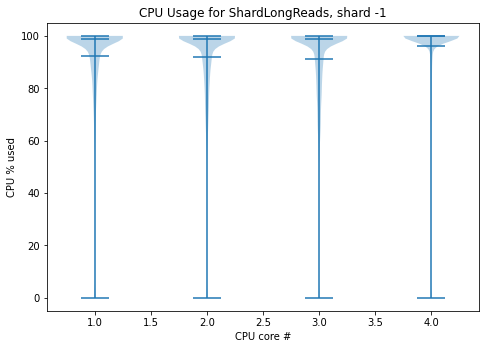

5469610115590913287
7.0


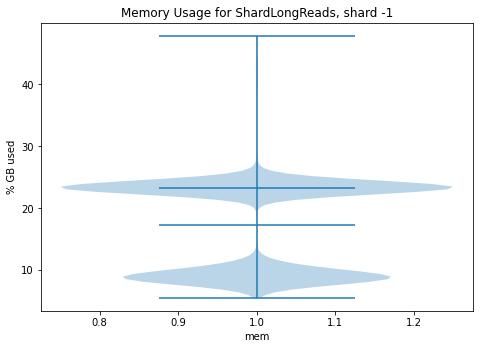

[1149.0]


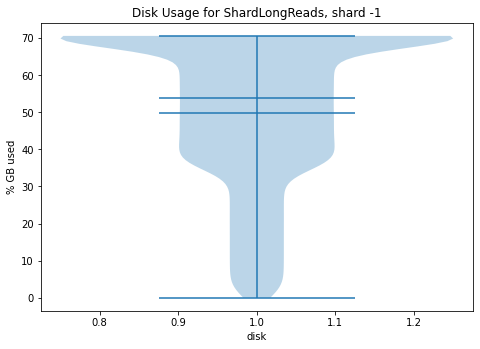

Working on Task: GetRunInfo


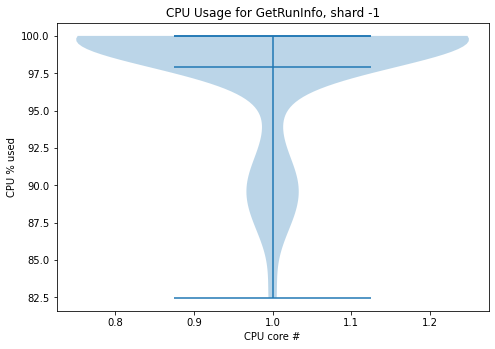

3377514490394180871
1.0


[1.0]


Working on Task: SummarizeSubreadsPBI


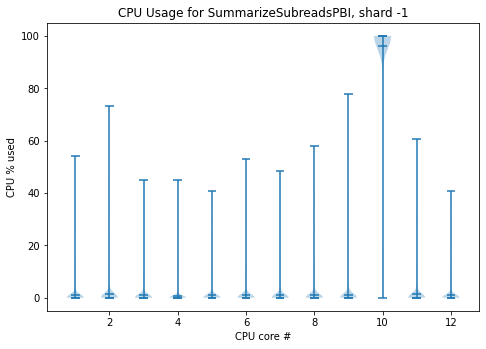

5083104333586627848
72.0


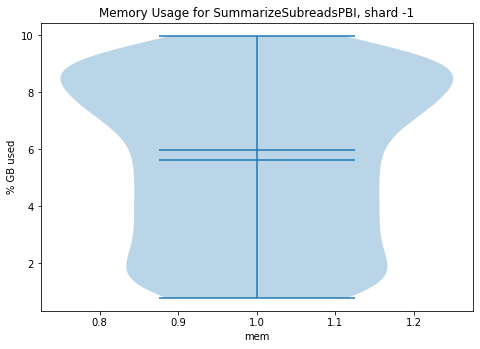

[2.0]


Working on Task: ComputeGenomeLength


7388418881434287368
1.0


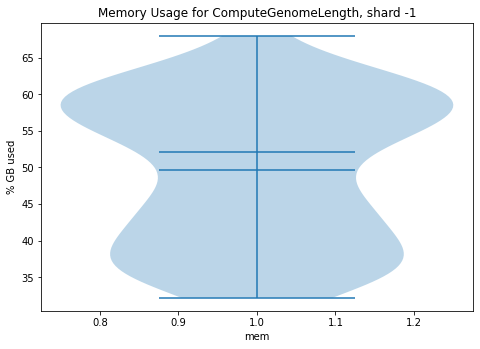

[6.0]


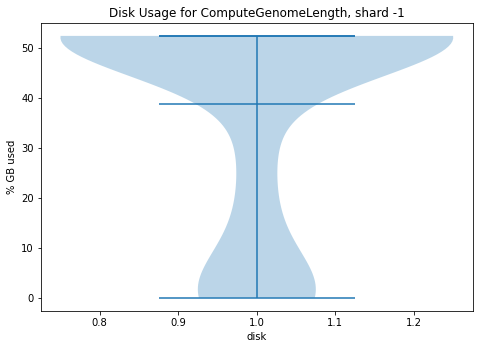

Working on Task: MergeAllFastqs


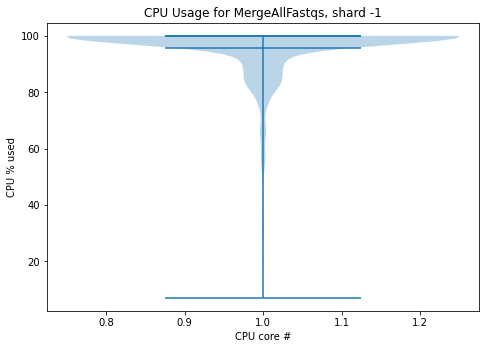

7571894378171274287
1.0


[21.0]


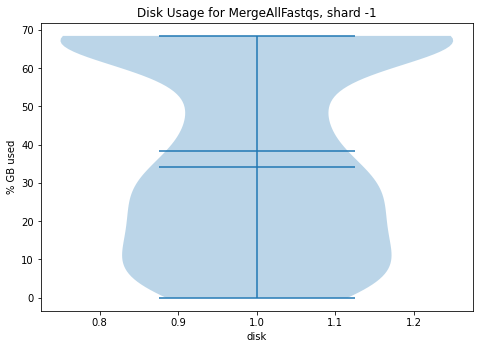

Working on Task: MergeCCSUnalignedReads


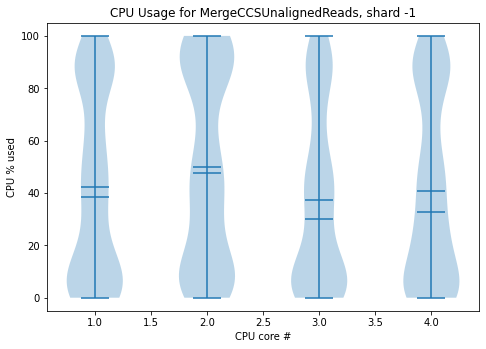

2801269250959677217
20.0


[28.0]


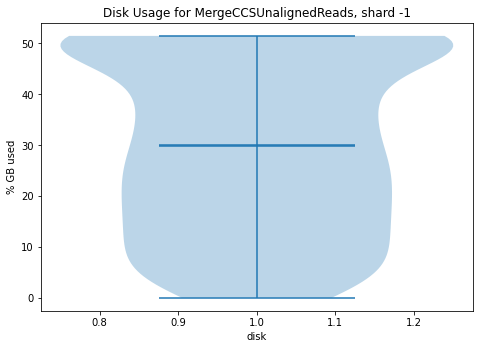

Working on Task: MergeAlignedReads


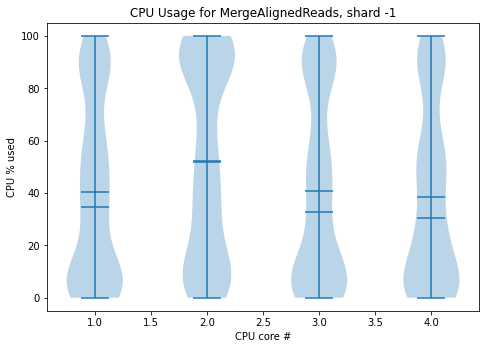

2310978994451584389
20.0


[28.0]


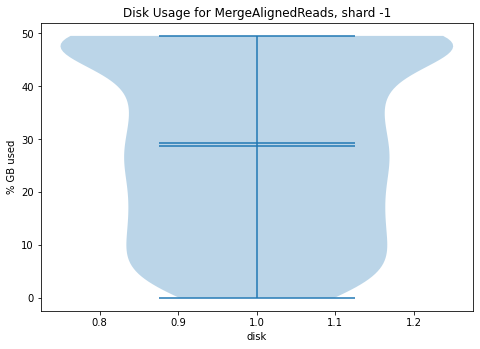

Working on Task: IndexCCSUnalignedReads


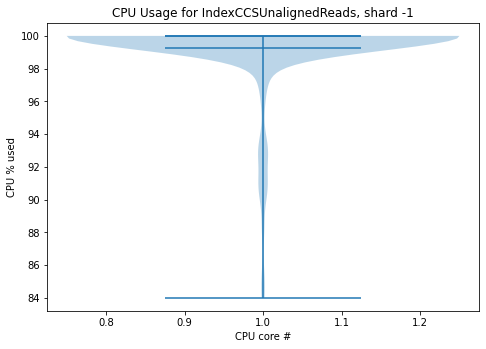

4030983714257048145
4.0


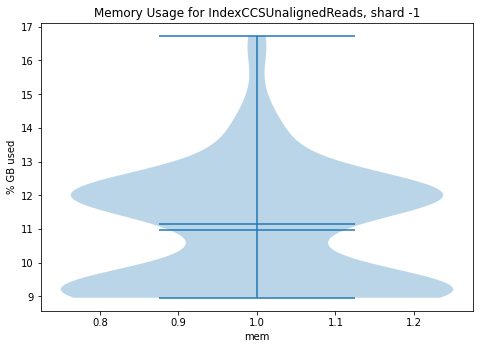

[15.0]


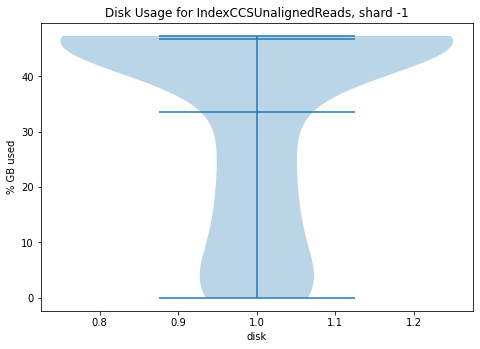

Working on Task: MergeCCSReports


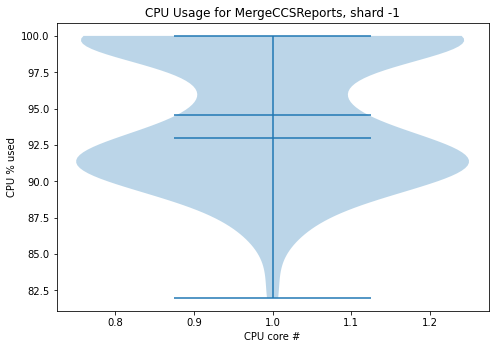

4563851459039139375
1.0


[3.0]


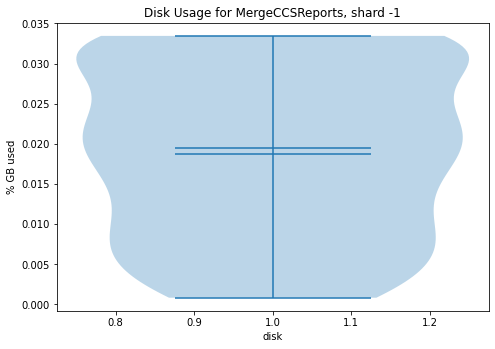

Working on Task: SummarizeCCSReport


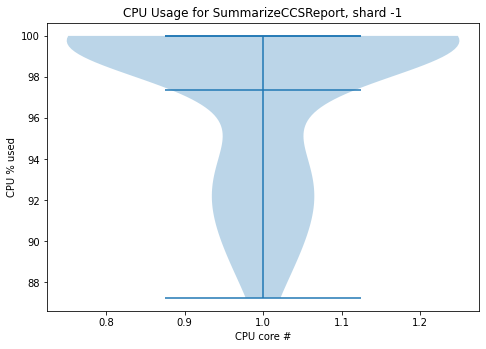

8347391461228876881
1.0


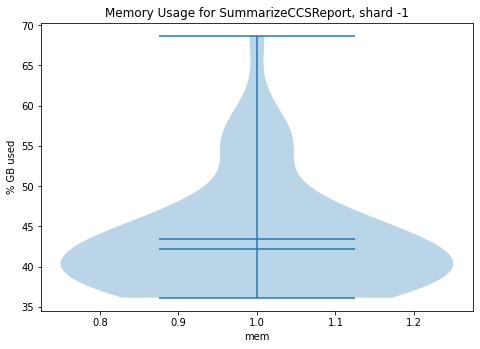

[2.0]


Working on Task: FinalizeCCSReport


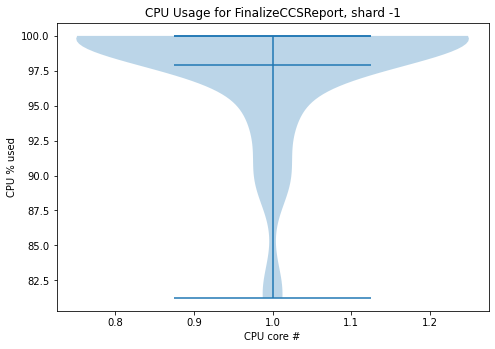

6053538798114772252
1.0


[10.0]


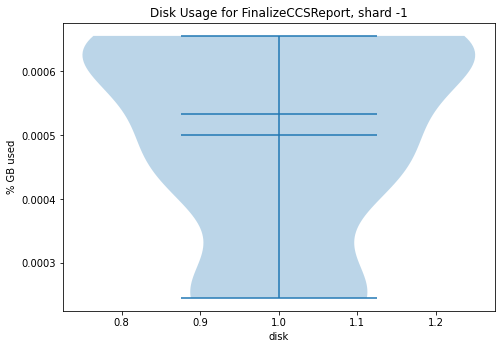

Working on Task: FinalizeCCSUnalignedBam


6315408425940226641
1.0


[10.0]


the instance id: 3870777233638278011 in meta_runtime does not exist in metrics
the instance id: 2439162220386304893 in meta_runtime does not exist in metrics
the instance id: 3870777233638278011 in meta_runtime does not exist in metrics
the instance id: 2439162220386304893 in meta_runtime does not exist in metrics
the instance id: 3870777233638278011 in meta_runtime does not exist in metrics
the instance id: 2439162220386304893 in meta_runtime does not exist in metrics
the instance id: 3870777233638278011 in meta_runtime does not exist in metrics
the instance id: 2439162220386304893 in meta_runtime does not exist in metrics
the instance id: 3870777233638278011 in meta_runtime does not exist in metrics
the instance id: 2439162220386304893 in meta_runtime does not exist in metrics
the instance id: 3870777233638278011 in meta_runtime does not exist in metrics
the instance id: 2439162220386304893 in meta_runtime does not exist in metrics


the instance id: 6163556017489388902 in meta_runtime does not exist in metrics
the instance id: 5253459018766951067 in meta_runtime does not exist in metrics
the instance id: 6163556017489388902 in meta_runtime does not exist in metrics
the instance id: 5253459018766951067 in meta_runtime does not exist in metrics
the instance id: 6163556017489388902 in meta_runtime does not exist in metrics
the instance id: 5253459018766951067 in meta_runtime does not exist in metrics
the instance id: 6163556017489388902 in meta_runtime does not exist in metrics
the instance id: 5253459018766951067 in meta_runtime does not exist in metrics
the instance id: 6163556017489388902 in meta_runtime does not exist in metrics
the instance id: 5253459018766951067 in meta_runtime does not exist in metrics
the instance id: 6163556017489388902 in meta_runtime does not exist in metrics
the instance id: 5253459018766951067 in meta_runtime does not exist in metrics


the instance id: 6252261050795501212 in meta_runtime does not exist in metrics
the instance id: 7235852447555330067 in meta_runtime does not exist in metrics
the instance id: 6252261050795501212 in meta_runtime does not exist in metrics
the instance id: 7235852447555330067 in meta_runtime does not exist in metrics
the instance id: 6252261050795501212 in meta_runtime does not exist in metrics
the instance id: 7235852447555330067 in meta_runtime does not exist in metrics
the instance id: 6252261050795501212 in meta_runtime does not exist in metrics
the instance id: 7235852447555330067 in meta_runtime does not exist in metrics
the instance id: 6252261050795501212 in meta_runtime does not exist in metrics
the instance id: 7235852447555330067 in meta_runtime does not exist in metrics
the instance id: 6252261050795501212 in meta_runtime does not exist in metrics
the instance id: 7235852447555330067 in meta_runtime does not exist in metrics


the instance id: 7686637646414424198 in meta_runtime does not exist in metrics
the instance id: 7686637646414424198 in meta_runtime does not exist in metrics
the instance id: 7686637646414424198 in meta_runtime does not exist in metrics
the instance id: 7686637646414424198 in meta_runtime does not exist in metrics
the instance id: 7686637646414424198 in meta_runtime does not exist in metrics
the instance id: 7686637646414424198 in meta_runtime does not exist in metrics


In [191]:
test2 = ResourceUsage(ds_meta_runtime, ds_metrics, "otester");

In [69]:
t = pd.DataFrame(index=["max_value"], columns=["yeet", "yeeter", "yeetest"])
display(t)
tup = ("yeet", 1)
a = t.loc["max_value", tup[0]]
display(a)

yeet yeeter yeetest
max_value  NaN    NaN     NaN

nan

In [102]:
'2439162220386304893' in ds_metrics['metrics_instance_id'].astype('str')

False

In [149]:
'2801269250959677217' in ds_metrics['metrics_instance_id'].astype('str')

False

In [169]:
ds_metrics['metrics_instance_id'].tolist()[799]

2801269250959677217

In [171]:
ds_metrics['metrics_instance_id'].loc[0]

0    2801269250959677217
0    4203826800409559933
0    9032552557279257575
0    7845652840544281407
0    1274432562192524228
0     545524303654626072
0    1201526660574028370
0     871469625151136857
0    6053538798114772252
Name: metrics_instance_id, dtype: int64

In [158]:
len(ds_metrics['metrics_timestamp'])

672223

In [125]:
x = ds_metrics.iloc[0,:]

In [126]:
type(x)

pandas.core.series.Series

In [127]:
x.index

Index(['metrics_cpu_used_percent', 'metrics_disk_read_iops',
       'metrics_disk_used_gb', 'metrics_disk_write_iops',
       'metrics_instance_id', 'metrics_mem_used_gb', 'metrics_timestamp'],
      dtype='object')

In [145]:
x['metrics_mem_used_gb']

0.46631731200000004

In [146]:
ds_metrics['metrics_instance_id'].tolist()[0]

2801269250959677217

In [173]:
###Do stats
###Make faster even faster using set (hashing)
###One task has over 70 CPU cores, plot is unreadable

Working on Task: AssembleForHaplotigs


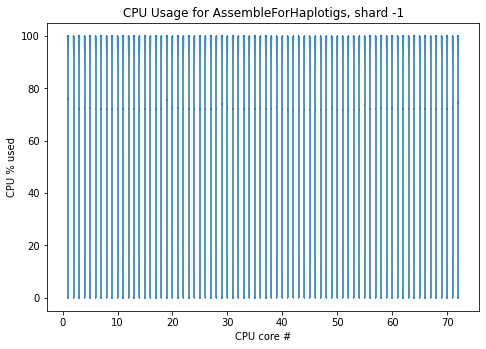

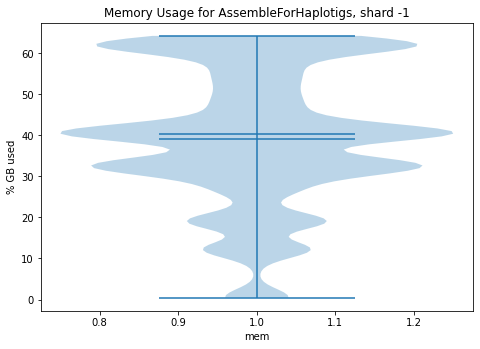

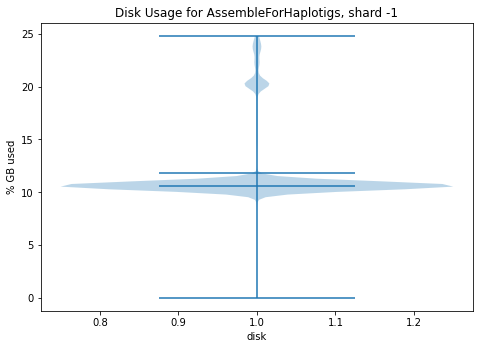

Working on Task: AssembleForAltContigs
Instance id: 970310227228415178 for task: AssembleForAltContigs shard: -1 was not found in metrics


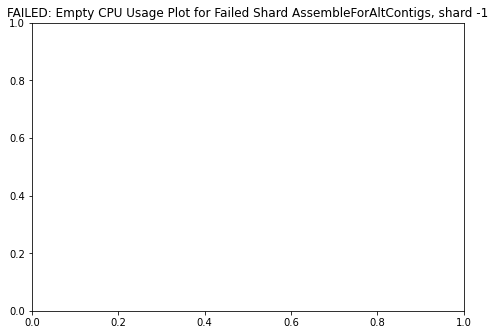

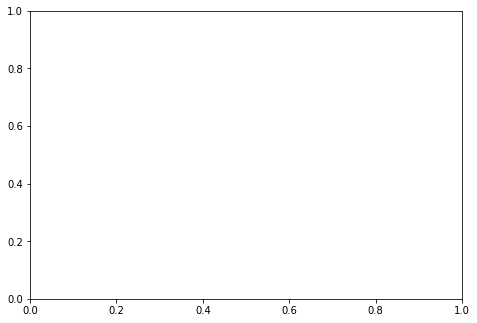

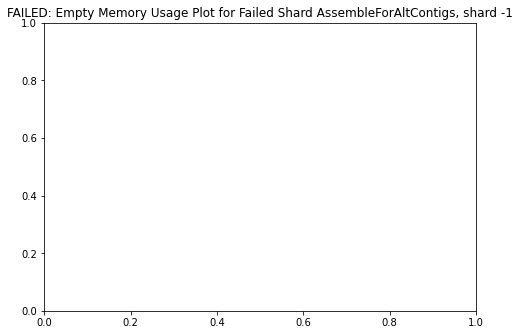

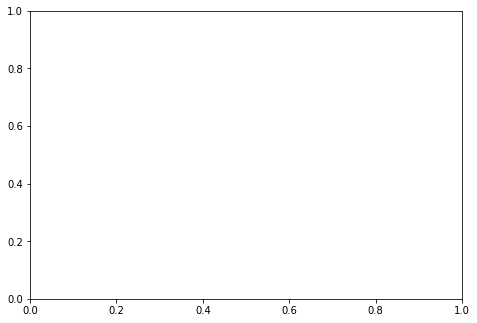

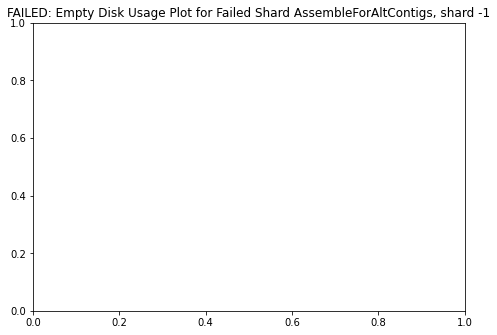

Working on Task: AlignAsPAF


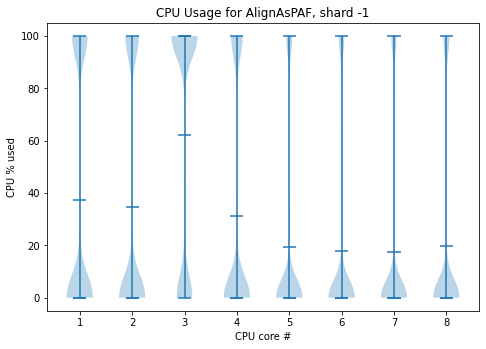

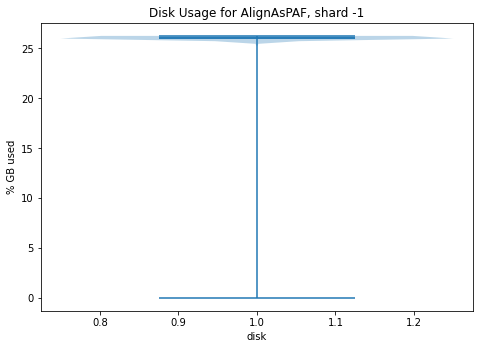

Working on Task: Paftools
Instance id: 5464028212887795354 for task: Paftools shard: -1 was not found in metrics


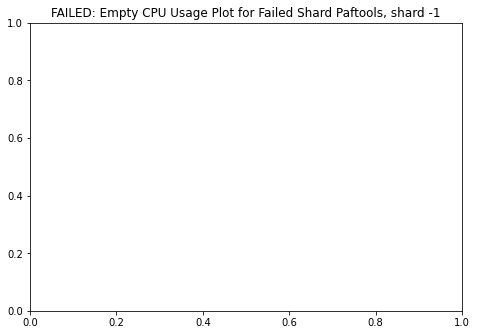

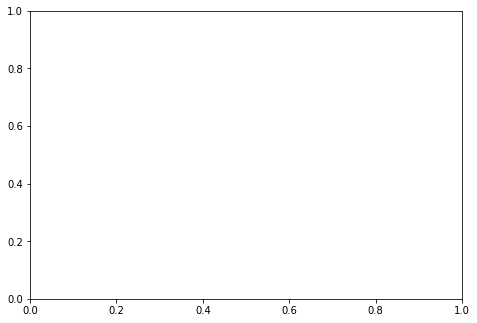

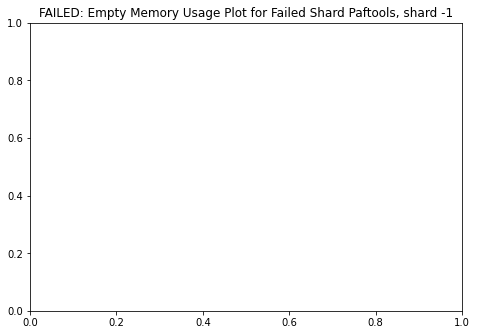

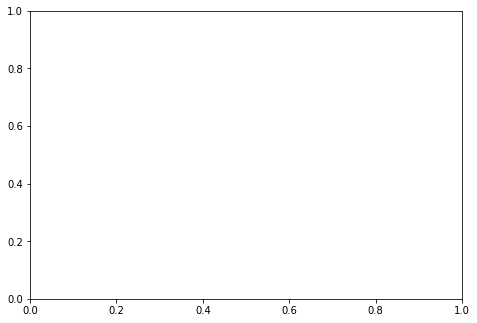

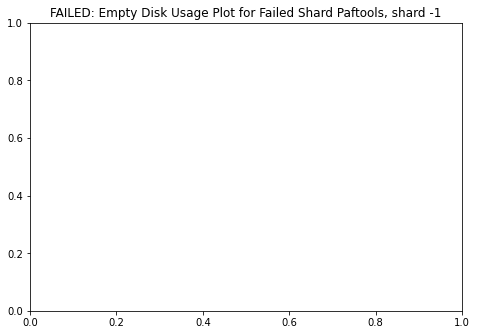

Working on Task: FinalizePafToolsVcf


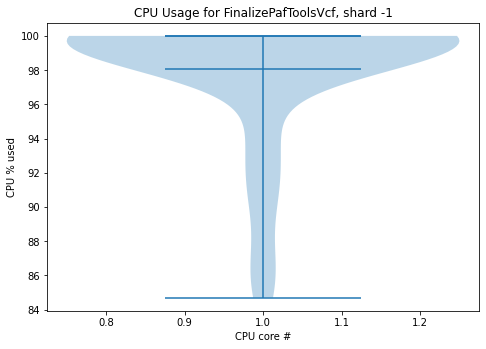

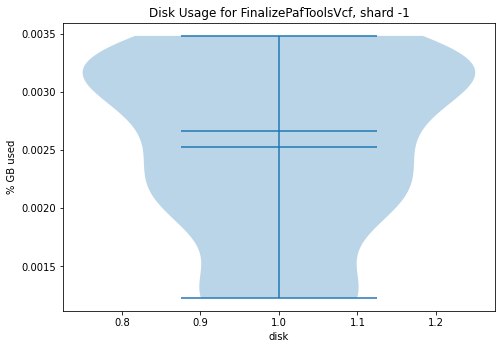

Working on Task: FinalizeHifiasmAlternateGfa
Instance id: 6931321790050358102 for task: FinalizeHifiasmAlternateGfa shard: -1 was not found in metrics


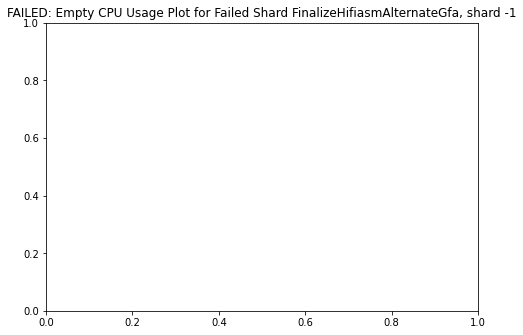

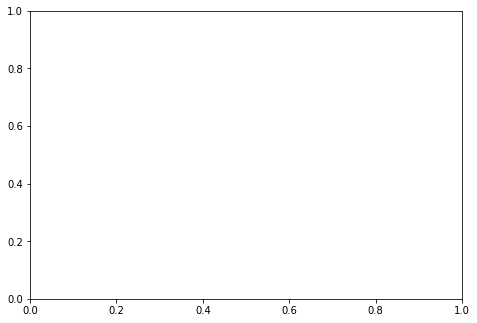

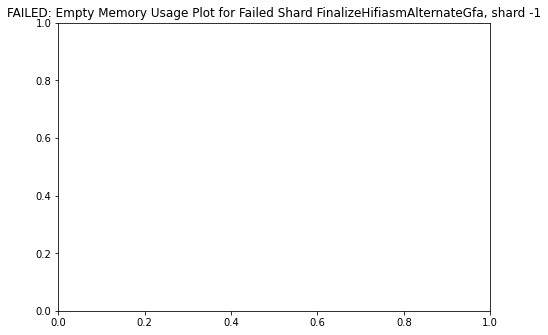

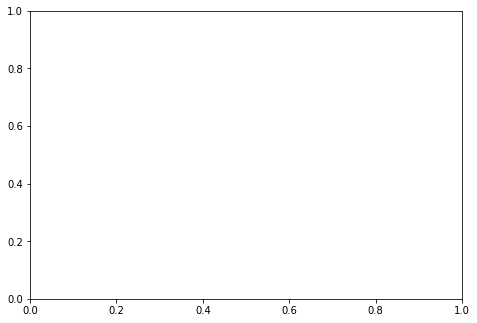

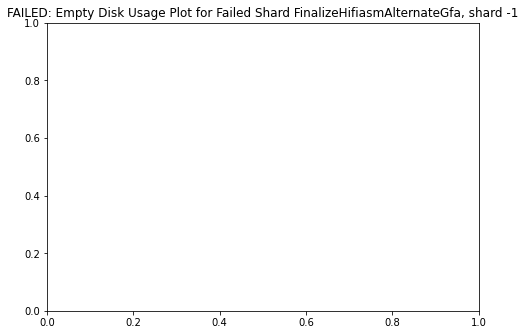

Working on Task: MergeAllFastqs


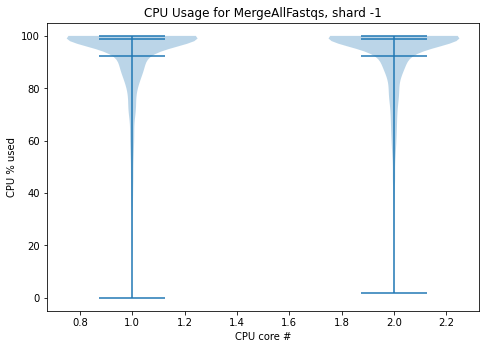

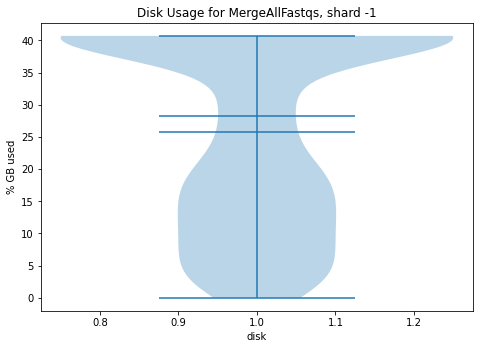

Working on Task: FinalizePaf
Instance id: 94250719772915564 for task: FinalizePaf shard: -1 was not found in metrics


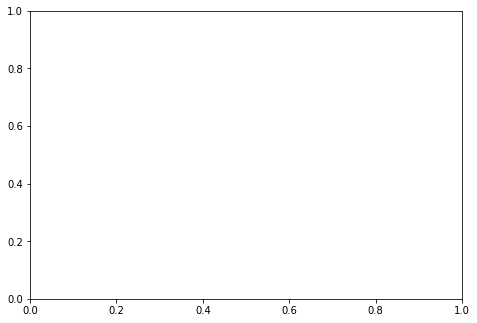

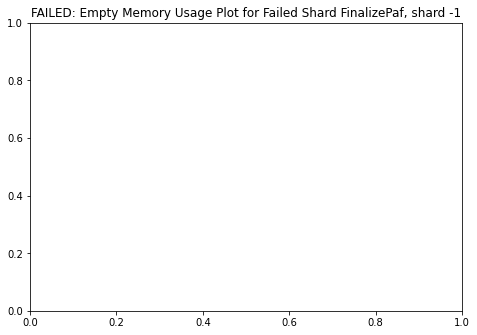

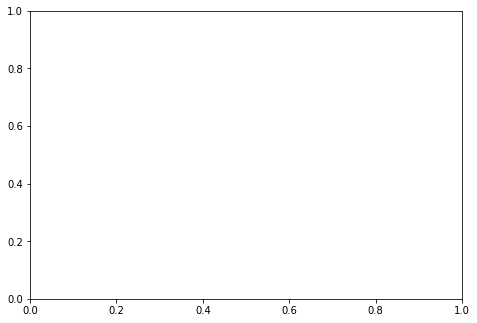

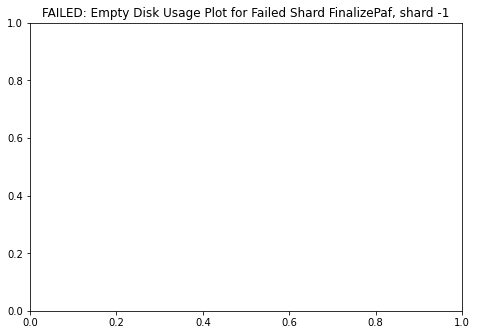

Working on Task: FinalizeHifiasmHapGfas


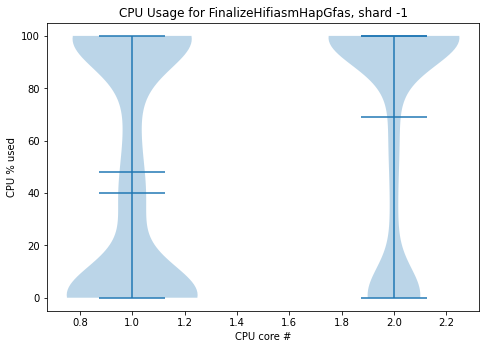

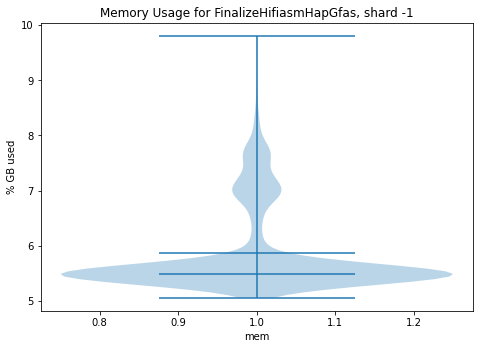

Working on Task: FinalizeHifiasmPrimaryGfa


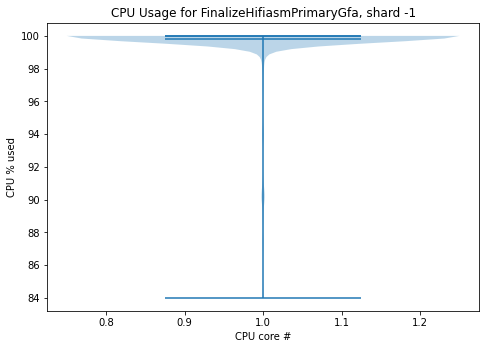

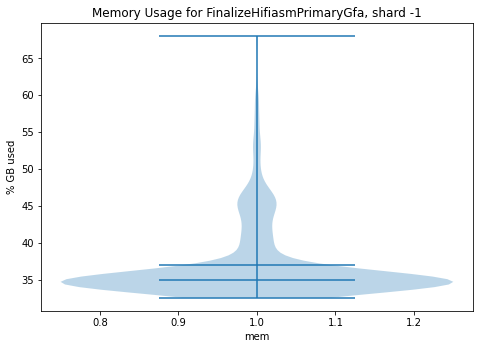

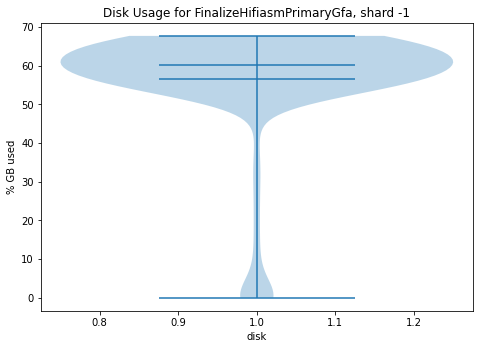

Working on Task: FinalizeHifiasmHapTigs
Instance id: 132530955828089686 for task: FinalizeHifiasmHapTigs shard: -1 was not found in metrics


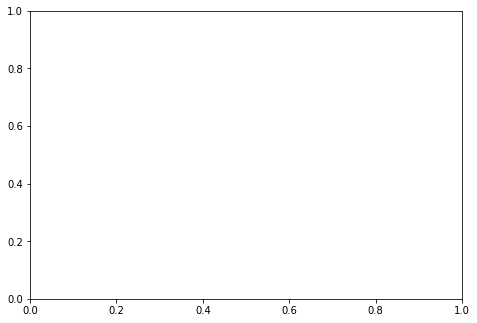

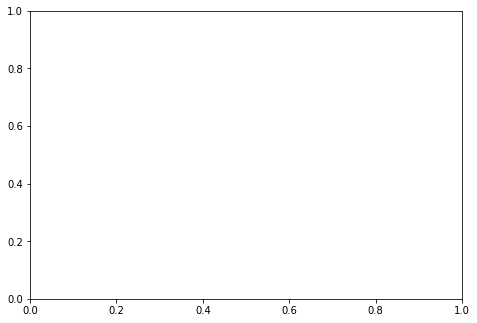

Working on Task: FinalizeHifiasmPrimaryFa


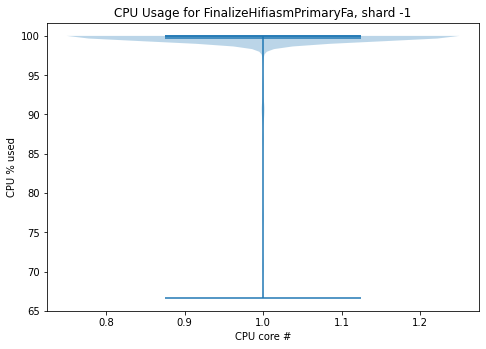

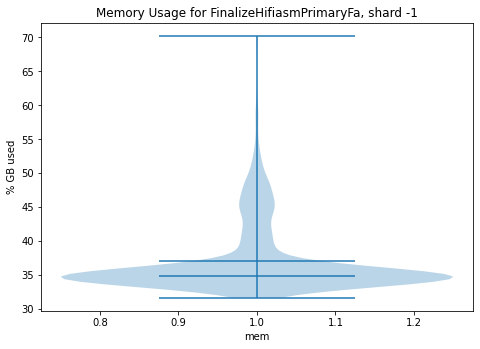

Working on Task: Quast
Instance id: 1421099313032876887 for task: Quast shard: -1 was not found in metrics


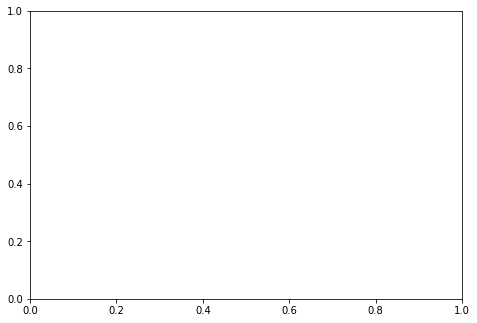

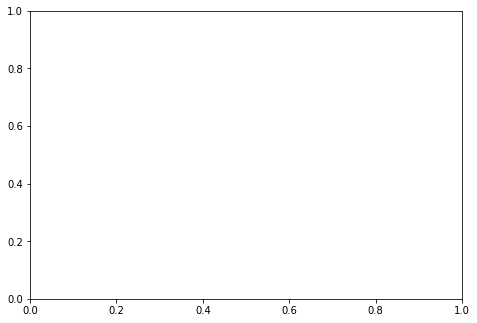

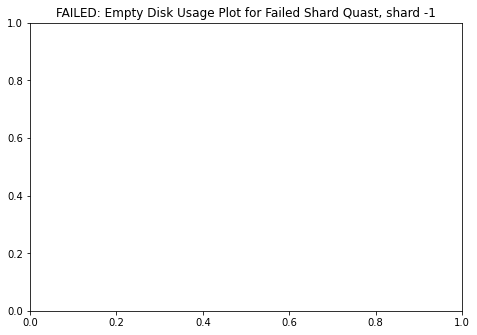

Working on Task: FinalizeQuastReportHtml


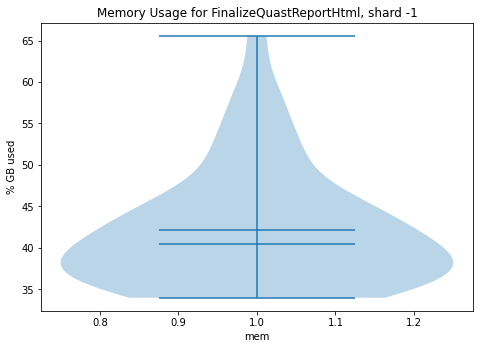

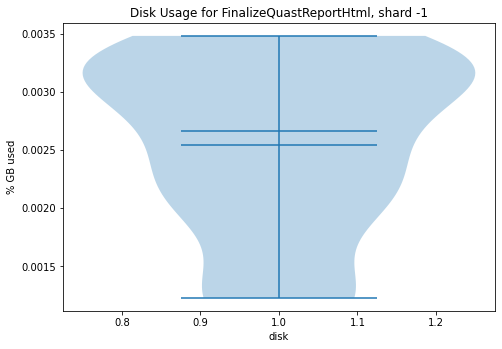

Working on Task: FinalizeHifiasmAlternateFa


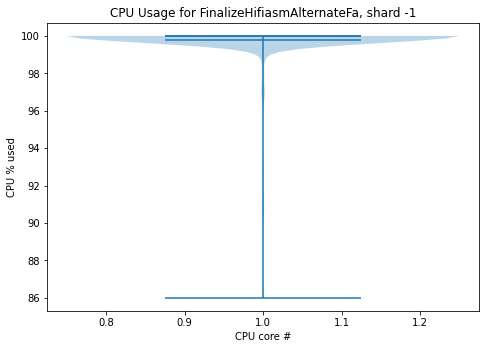

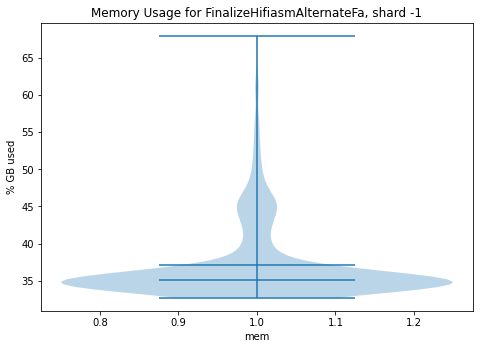

Working on Task: FinalizeQuastReportTxt


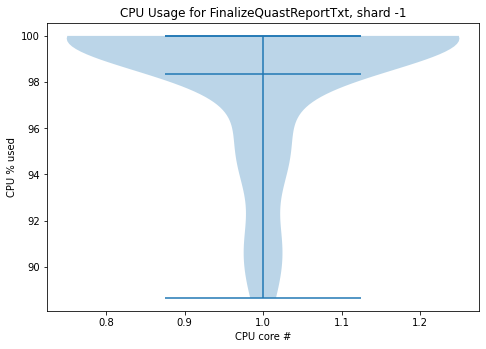

the instance id: 1576052047921302936 in meta_runtime does not exist in metrics
the instance id: 7498956238531612056 in meta_runtime does not exist in metrics
the instance id: 1576052047921302936 in meta_runtime does not exist in metrics
the instance id: 7498956238531612056 in meta_runtime does not exist in metrics
the instance id: 1576052047921302936 in meta_runtime does not exist in metrics
the instance id: 7498956238531612056 in meta_runtime does not exist in metrics
the instance id: 1576052047921302936 in meta_runtime does not exist in metrics
the instance id: 7498956238531612056 in meta_runtime does not exist in metrics
the instance id: 1576052047921302936 in meta_runtime does not exist in metrics
the instance id: 7498956238531612056 in meta_runtime does not exist in metrics
the instance id: 1576052047921302936 in meta_runtime does not exist in metrics
the instance id: 7498956238531612056 in meta_runtime does not exist in metrics


In [214]:
tester = ResourceUsage(ds_meta_runtime2, ds_metrics2, "tester")

In [181]:
print(ds_meta_runtime2[ds_meta_runtime2["runtime_instance_id"] == 362003610980111562])

   meta_attempt  meta_cpu  meta_disk_mounts meta_disk_total_gb  \
0             1        72  [/cromwell_root]            [720.0]   
1             1        72  [/cromwell_root]            [720.0]   

  meta_disk_types                                  meta_docker_image  \
0           [HDD]  us.gcr.io/broad-dsp-lrma/lr-hifiasm@sha256:0b2...   
1           [HDD]  us.gcr.io/broad-dsp-lrma/lr-hifiasm@sha256:0b2...   

                     meta_end_time meta_execution_status  \
0 2021-09-24 15:23:57.332000+00:00                  Done   
1 2021-09-24 15:23:57.332000+00:00                  Done   

                                         meta_inputs  \
0  [{'key': 'default_attr["boot_disk_gb"]', 'type...   
1  [{'key': 'default_attr["boot_disk_gb"]', 'type...   

                                  meta_instance_name  ...  \
0  google-pipelines-worker-3f656b1eae080d0209ee55...  ...   
1  google-pipelines-worker-3f656b1eae080d0209ee55...  ...   

   runtime_instance_id                            

In [188]:
debugger = ds_meta_runtime2[ds_meta_runtime2["runtime_instance_id"] == 362003610980111562].iloc[0,:]
debugger

meta_attempt                                                              1
meta_cpu                                                                 72
meta_disk_mounts                                           [/cromwell_root]
meta_disk_total_gb                                                  [720.0]
meta_disk_types                                                       [HDD]
meta_docker_image         us.gcr.io/broad-dsp-lrma/lr-hifiasm@sha256:0b2...
meta_end_time                              2021-09-24 15:23:57.332000+00:00
meta_execution_status                                                  Done
meta_inputs               [{'key': 'default_attr["boot_disk_gb"]', 'type...
meta_instance_name        google-pipelines-worker-3f656b1eae080d0209ee55...
meta_mem_total_gb                                                     288.0
meta_preemptible                                                      False
meta_project_id                                              broad-dsp-lrma
meta_shard  

In [216]:
ds_metrics2[ds_metrics2["metrics_instance_id"] == 1576052047921302936]

Empty DataFrame
Columns: [metrics_cpu_used_percent, metrics_disk_read_iops, metrics_disk_used_gb, metrics_disk_write_iops, metrics_instance_id, metrics_mem_used_gb, metrics_timestamp]
Index: []

In [215]:
ds_meta_runtime2[ds_meta_runtime2["runtime_instance_id"] == 1576052047921302936]

meta_attempt  meta_cpu  meta_disk_mounts meta_disk_total_gb  \
13             1         1  [/cromwell_root]              [2.0]   

   meta_disk_types                                  meta_docker_image  \
13           [HDD]  us.gcr.io/broad-dsp-lrma/lr-finalize@sha256:18...   

                      meta_end_time meta_execution_status  \
13 2021-09-24 15:52:57.332000+00:00                  Done   

                                          meta_inputs  \
13  [{'key': 'base', 'type': 'string', 'value': 'r...   

                                   meta_instance_name  ...  \
13  google-pipelines-worker-583282c1e1493d1e922db6...  ...   

    runtime_instance_id                              runtime_instance_name  \
13  1576052047921302936  google-pipelines-worker-583282c1e1493d1e922db6...   

   runtime_mem_total_gb  runtime_preemptible runtime_project_id runtime_shard  \
13             1.029939                 True     broad-dsp-lrma             0   

                 runtime_start_time          runtime_task_call_name  \
13 2021-09-24 15:50:58.790782+00:00  FinalizeQuastIndividualSummary   

                     runtime_workflow_id  runtime_zone  
13  c144b3c4-334c-48b3-9531-20feacb4eaa9    us-east1-c  

[1 rows x 35 columns]